In [13]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [14]:
station_label = pd.read_csv('clean_data/station_label.csv')
traffic_volume = pd.read_csv('clean_data/traffic_volume.csv')

In [15]:
station_label.head()

,station_id,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,...,startCount_22,endCount_22,startCount_23,endCount_23,label,capacity,lat,lon,name,short_name
0,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1018.0,2228.0,701.0,1428.0,3,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02
1,445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1164.0,3341.0,1105.0,2287.0,1,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05
2,487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,931.0,2288.0,511.0,1403.0,3,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02
3,504,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2145.0,2749.0,1666.0,1780.0,1,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08
4,72,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,800.0,1224.0,565.0,653.0,3,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01


In [4]:
station_type_feature = station_label.groupby('label').mean().drop(columns=['station_id', 'lat', 'lon', 'capacity'])

In [5]:
station_type_feature.head()

,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,...,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
label,,,,,,,,,,,,,,,,,,,,,
0,54.857143,59.267857,52.375000,41.625000,34.517857,39.428571,55.250000,45.392857,19.053571,8.767857,...,1739.464286,1423.910714,1017.785714,856.910714,634.732143,555.232143,440.732143,403.821429,298.607143,282.642857
1,3.452830,3.773585,5.773585,5.283019,6.150943,9.603774,6.716981,3.226415,3.018868,3.849057,...,4170.094340,4648.433962,2954.867925,3198.547170,2270.018868,2298.150943,1784.735849,1749.716981,1224.169811,1216.339623
2,12.030556,11.613889,12.369444,12.336111,6.702778,4.186111,8.058333,8.950000,10.813889,8.208333,...,341.788889,452.158333,247.794444,323.538889,177.261111,235.280556,133.472222,186.286111,92.955556,134.455556
3,5.536842,6.494737,7.273684,7.663158,8.968421,8.589474,18.305263,5.557895,4.284211,1.757895,...,2616.821053,2862.673684,1808.736842,1971.231579,1278.242105,1381.778947,955.747368,1018.442105,619.094737,672.000000
4,6.208333,6.004630,6.444444,8.736111,6.074074,7.851852,7.685185,3.449074,2.870370,2.652778,...,1144.759259,1403.199074,801.523148,962.606481,573.365741,672.361111,431.657407,497.472222,281.888889,342.027778


In [6]:
def normalize(rawList):
    return([i/sum(rawList) for i in rawList])

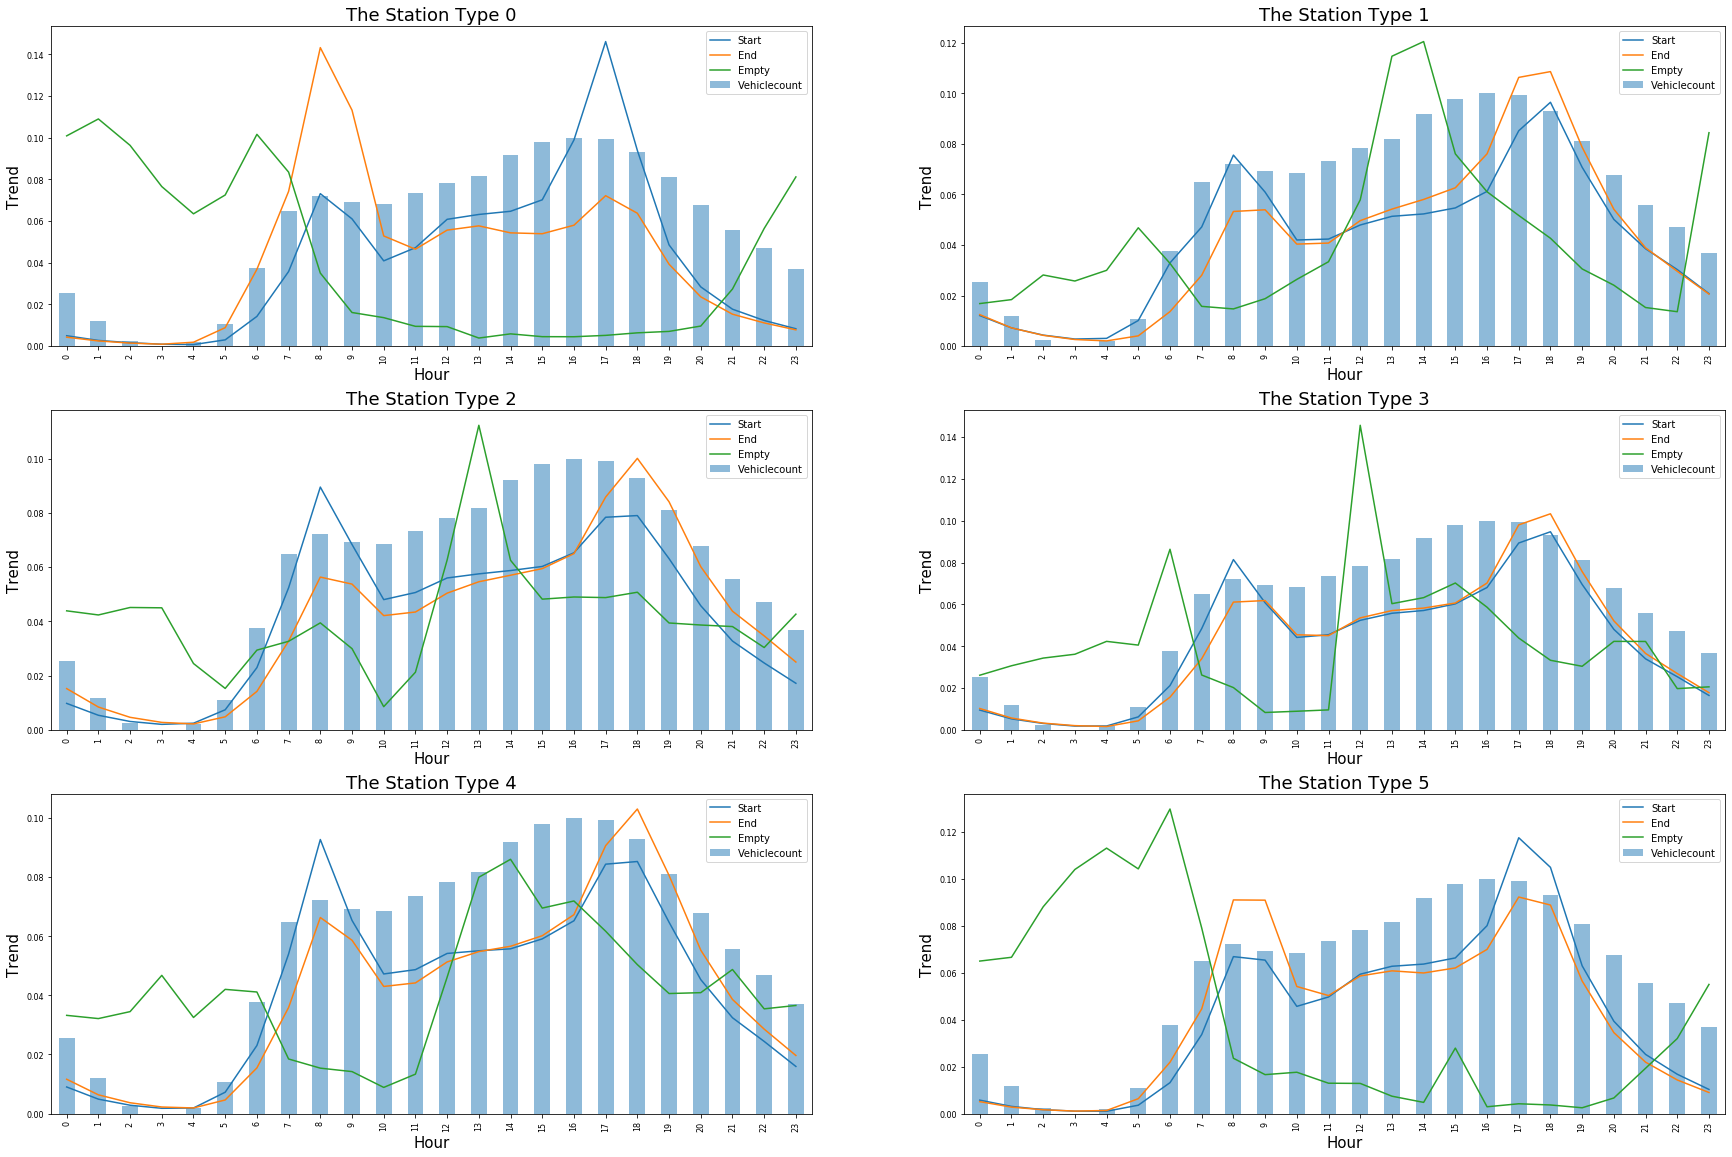

In [7]:
dailyRange = range(0,24)
scaler = MinMaxScaler(feature_range=(0, 0.1))

fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Hour",fontsize=15)
    pl.ylabel("Trend",fontsize=15)
    
    ax.plot(dailyRange, normalize(list(station_type_feature.iloc[i][24:72:2])), label="Start")
    ax.plot(dailyRange, normalize(list(station_type_feature.iloc[i][25:72:2])), label="End")
    ax.plot(dailyRange, normalize(list(station_type_feature.iloc[i][0:24])), label="Empty")
    pd.DataFrame(scaler.fit_transform(traffic_volume))[0].plot(x=dailyRange,kind="bar", alpha=0.5, label="Vehiclecount", ax = ax)
    
    #pl.xticks(rotation=70)
    pl.legend()

此图用来看趋势。Norm是对该类型站点各个时间的start/end/empty数据进行处理，反应的是本类型站点在不同时间段的趋势。因为norm后，和各个站点实际start end数量无关。

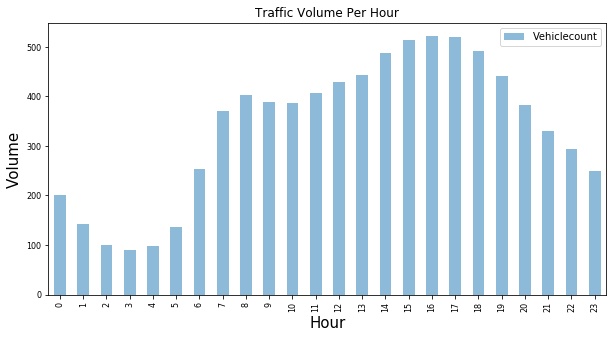

In [8]:
dailyRange = range(0,24)

fig = pl.figure(figsize=(10,5))

ax = fig.add_subplot(1,1,1)
ax.set_title("Traffic Volume Per Hour")
pl.xticks(fontsize=8)
pl.yticks(fontsize=8)
pl.xlabel("Hour",fontsize=15)
pl.ylabel("Volume",fontsize=15)

traffic_volume.Traffic_Volume.plot(x=dailyRange,kind="bar", alpha=0.5, label="Vehiclecount", ax = ax)

#pl.xticks(rotation=70)
pl.legend()

**start**

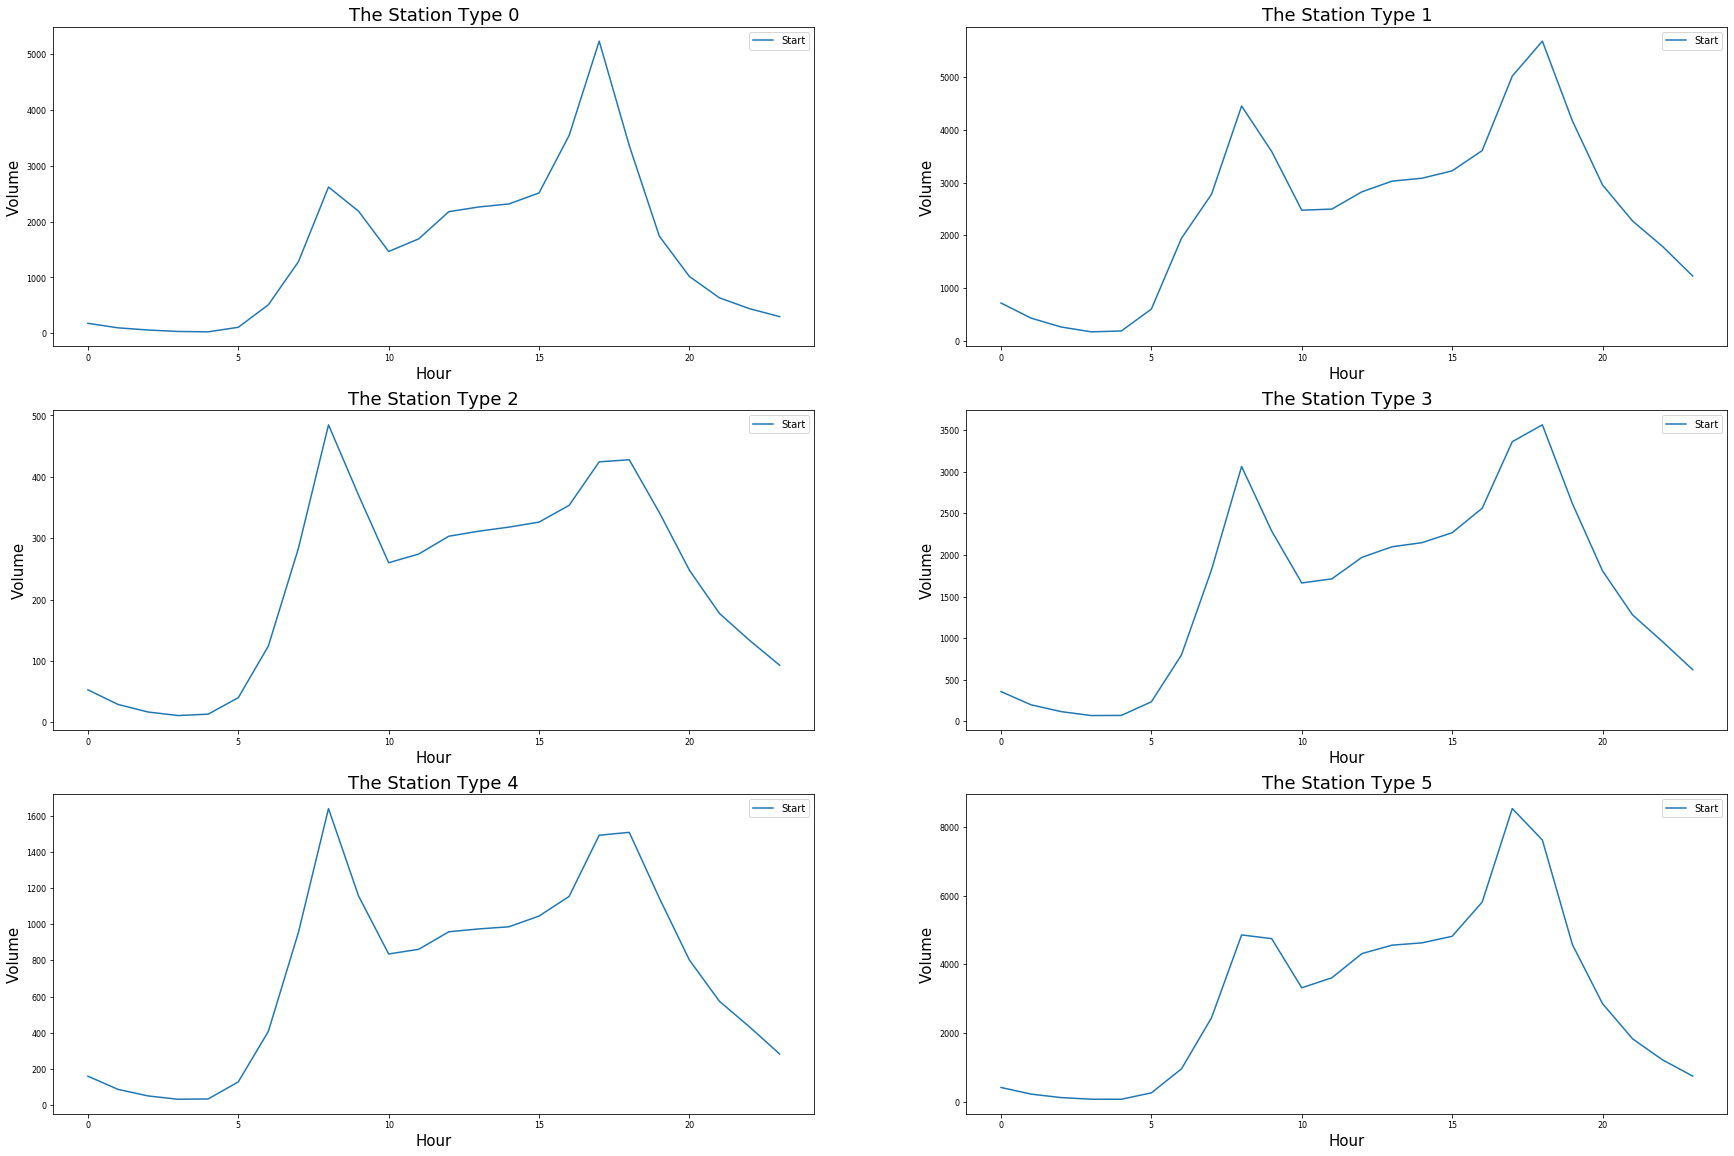

In [10]:
dailyRange = range(0,24)
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Hour",fontsize=15)
    pl.ylabel("Volume",fontsize=15)
    
    ax.plot(dailyRange, list(station_type_feature.iloc[i][24:72:2]), label="Start")
    
    pl.legend()

**End**

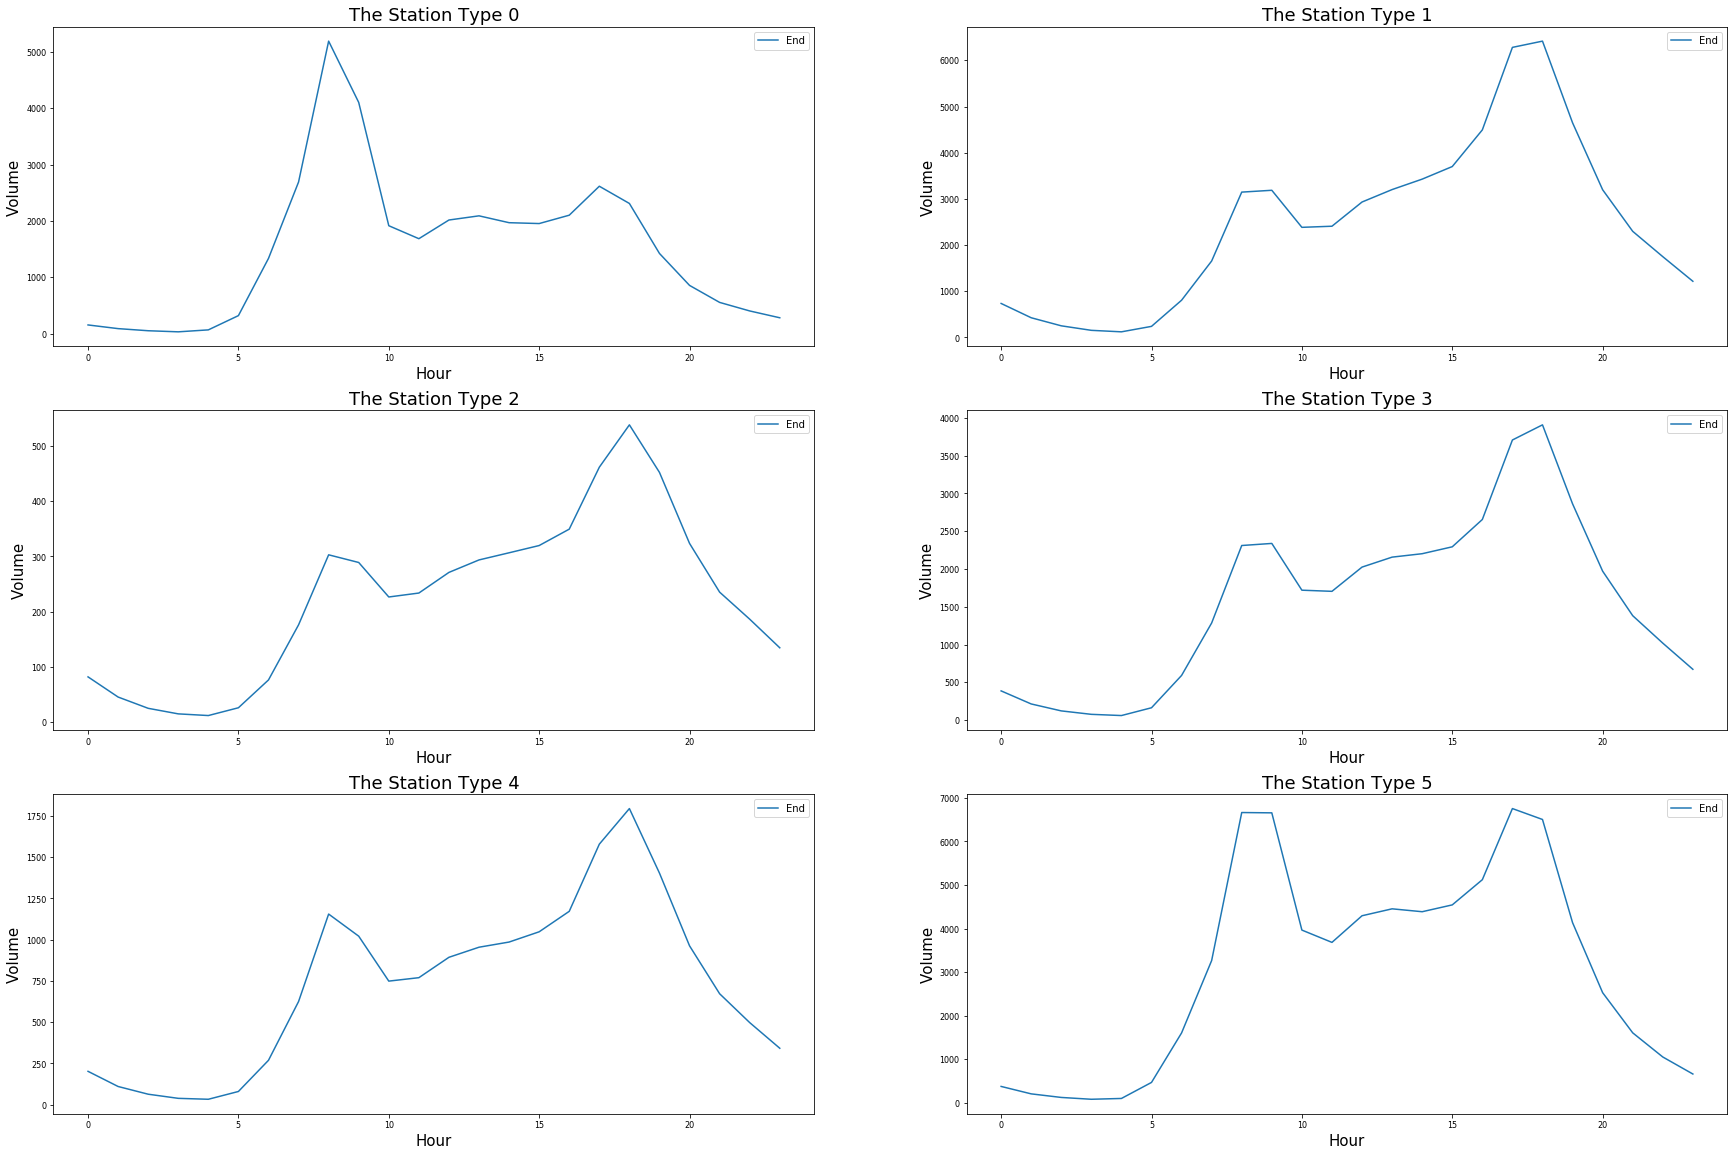

In [11]:
dailyRange = range(0,24)
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Hour",fontsize=15)
    pl.ylabel("Volume",fontsize=15)
    
    ax.plot(dailyRange, list(station_type_feature.iloc[i][25:72:2]), label="End")
    
    pl.legend()

**Empty**

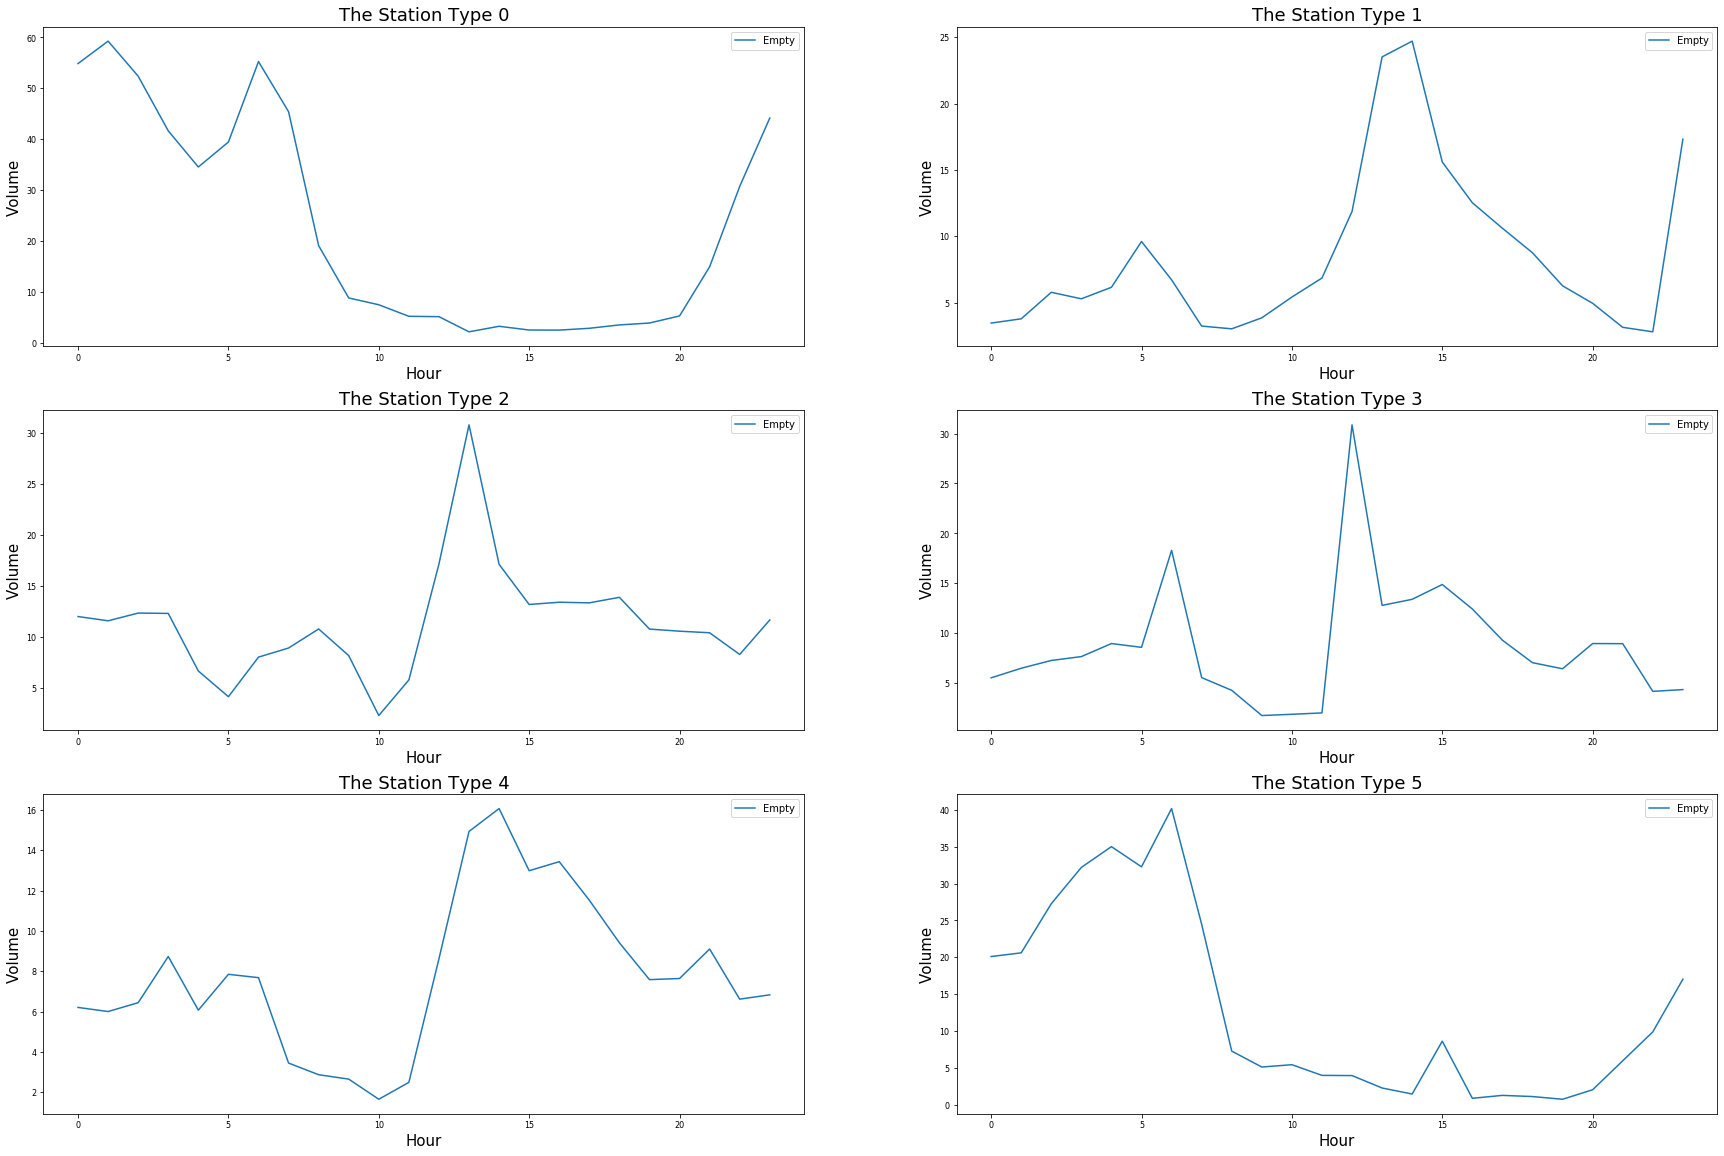

In [12]:
dailyRange = range(0,24)
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Hour",fontsize=15)
    pl.ylabel("Volume",fontsize=15)

    ax.plot(dailyRange, list(station_type_feature.iloc[i][0:24]), label="Empty")
    
    pl.legend()